# **Section 1: Dataset name**
My Dataset name is "saru_week10_data.pickle". It contains a list of data. Each data contains numpy array form of image and related category.

# **Section 2: Explanation of my data**
The main folder of my dataset is "saru_week10_data" containing 3 subfolder - crying, happy and sleeping (for each category or class). 
First, I downloaded a lot of images from google search using "Download All Images" chrome extension for each class (about 3000 images for each class). Then, I went through each sub-directories and deleted all the unrelated images. So, now "crying" has 564 images, "happy" has 815 images and "sleeping" has 609 images.

Then, I created training data out of it using pickle library and saved as "saru_week10_data.pickle". Each instance of my dataset contains array form of image and its related class as a list. Datatype of array image is uint8 and shape is 100 x 60 pixels.

In [17]:
#importing necessary libraries at first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

I use google colab. So, I first uploaded my folder as zip file and unzip it using following code.

In [18]:
!unzip -q saru_week10_data.zip

In [19]:
dir = 'saru_week10_data'

In [20]:
categories = ['crying','happy','sleeping']

In [21]:
ImgSizeW = 60
ImgSizeH = 100

In [22]:
#function to create training dataset
def createTrainingData():
    trainingData = []
    for category in categories:
        path = os.path.join(dir,category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(ImgSizeW,ImgSizeH))
                trainingData.append([new_array,category])
            except:
                pass
    return trainingData

In [23]:
dataset = createTrainingData() #creating dataset

100%|██████████| 609/609 [00:02<00:00, 253.08it/s]


In [24]:
len(dataset) #total length of my dataset

1988

In [25]:
first_img = dataset[0][0]
print(f'Shape of image: {first_img.shape}')
print(f'Datatype of image: {first_img.dtype}')
print(f'Image type: {type(first_img)}')


Shape of image: (100, 60)
Datatype of image: uint8
Image type: <class 'numpy.ndarray'>


# **Saving my dataset as pickle file**

In [26]:
import pickle

In [27]:
pickleOut = open('saru_week10_data.pickle','wb')
pickle.dump(dataset,pickleOut)
pickleOut.close()

# **Section 3: Loading my dataset**

In [28]:
pickleIn = open('saru_week10_data.pickle','rb')
data = pickle.load(pickleIn)

In [29]:
data[0] #first instance of my data

[array([[218, 220, 221, ..., 210, 208, 207],
        [219, 220, 222, ..., 210, 208, 207],
        [220, 221, 223, ..., 210, 208, 207],
        ...,
        [189, 189, 189, ..., 152, 152, 152],
        [203, 203, 208, ..., 151, 151, 152],
        [201, 201, 202, ..., 151, 151, 152]], dtype=uint8), 'crying']

# **Section 4: Showing data**

In [30]:
len(data) #total number of data

1988

In [31]:
#counting total number of data in each class
dict_ = {'crying':0,'happy':0,'sleeping':0}
for value in data:
  dict_[value[1]]+=1

In [32]:
valueCount = pd.DataFrame(dict_,index=['TotalRecords'])
valueCount

,crying,happy,sleeping
TotalRecords,564,815,609


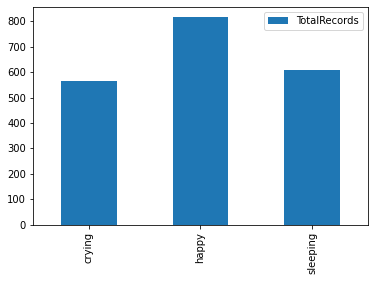

In [33]:
valueCount.transpose().plot(kind='bar') #histogram of distribution of my data

In [34]:
import random
random.shuffle(data) #shuffling the data

# **Plotting 16 images with its label**

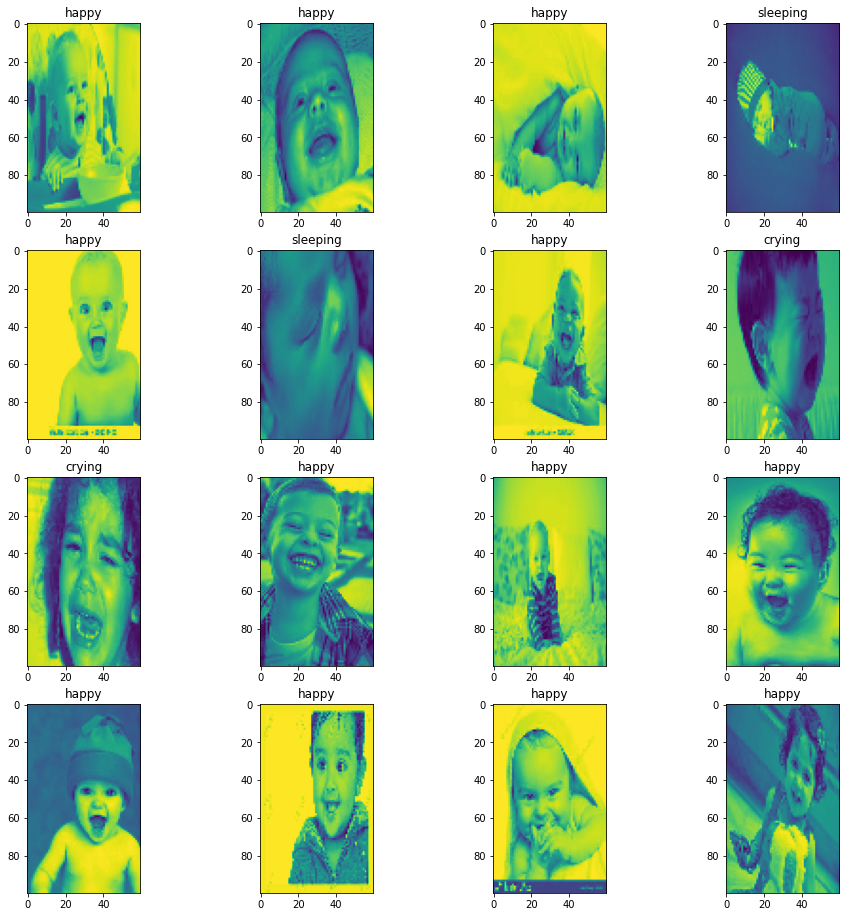

In [35]:
plt.figure(figsize=(16,16))
column = 4
row = 4
for i in range(1,row*column + 1):
  plt.subplot(row,column,i)
  plt.imshow(data[i][0])
  plt.title(data[i][1])
plt.show()

# **Splitting data into train, test set**
I am going to split the dataset into 80% training set and 20% testing set. In the following code, setting test_size=0.2 will do that.

In [36]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)